In [1]:
import pandas as pd 

In [2]:
file_path = "prompt_database_csv_new.xlsx"

In [3]:
data = pd.read_excel(file_path)


In [4]:
data.head()

,Prompt,Answer,Context,Organization,Prompt.1,Output,DeBERTa,FAVA,cosine_similarity
0,How much did the revenue of the IT Services se...,The revenue for the IT Services segment saw an...,Revenue\nOur revenue increased by 14.3%. Our I...,Wipro,NaN,The revenue of the IT Services segment increas...,0.839491,The revenue of the IT Services segment increas...,1.0
1,What factors contributed to the 2.0% decline i...,The IT Products segment experienced a 2.0% rev...,Revenue\nOur revenue increased by 14.3%. Our I...,Wipro,NaN,The 2.0% decline in IT Products segment revenu...,0.951768,The 2.0% decline in IT Products segment revenu...,1.0
2,By what percentage did revenue from the ISRE s...,"The ISRE segment's revenue declined by 20.2%, ...",Revenue\nOur revenue increased by 14.3%. Our I...,Wipro,NaN,Revenue from the ISRE segment declined by 20.2...,0.414557,Revenue from the ISRE segment declined by 20.2...,1.0
3,What strategic change was announced effective ...,"Effective April 1, 2023, the company announced...",Revenue\nOur revenue increased by 14.3%. Our I...,Wipro,NaN,"Effective April 1, 2023, the strategic change ...",0.929614,"Effective April 1, 2023, the strategic change ...",1.0
4,How did the selling and marketing expenses cha...,Selling and marketing expenses as a percentage...,Revenue\nOur revenue increased by 14.3%. Our I...,Wipro,NaN,The selling and marketing expenses as a percen...,0.182075,The selling and marketing expenses as a percen...,1.0


In [5]:
# Analyzing the 'DeBERTa' column
deberta_stats = data['DeBERTa'].describe()
deberta_stats

count    1005.000000
mean        0.463722
std         0.445076
min         0.000042
25%         0.001084
50%         0.379714
75%         0.995474
max         0.999913
Name: DeBERTa, dtype: float64

/tmp/ipykernel_159/318433739.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['DeBERTa'], shade=True, color="b", alpha=0.6)
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


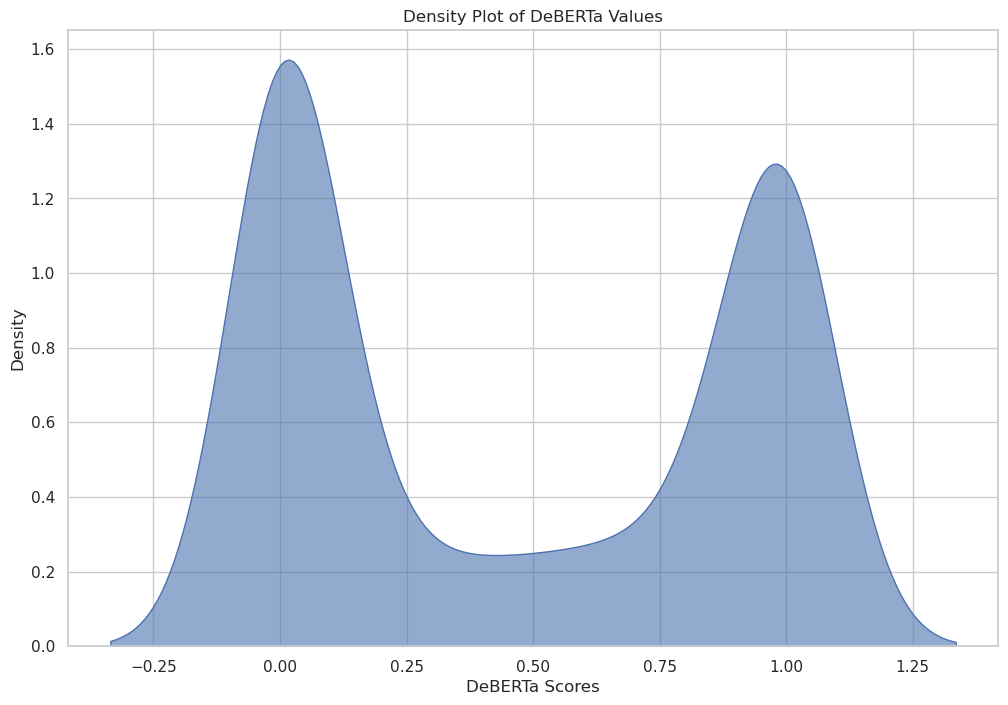

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting the density of the 'DeBERTa' column
plt.figure(figsize=(12, 8))
sns.kdeplot(data['DeBERTa'], shade=True, color="b", alpha=0.6)
plt.title('Density Plot of DeBERTa Values')
plt.xlabel('DeBERTa Scores')
plt.ylabel('Density')
plt.show()

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


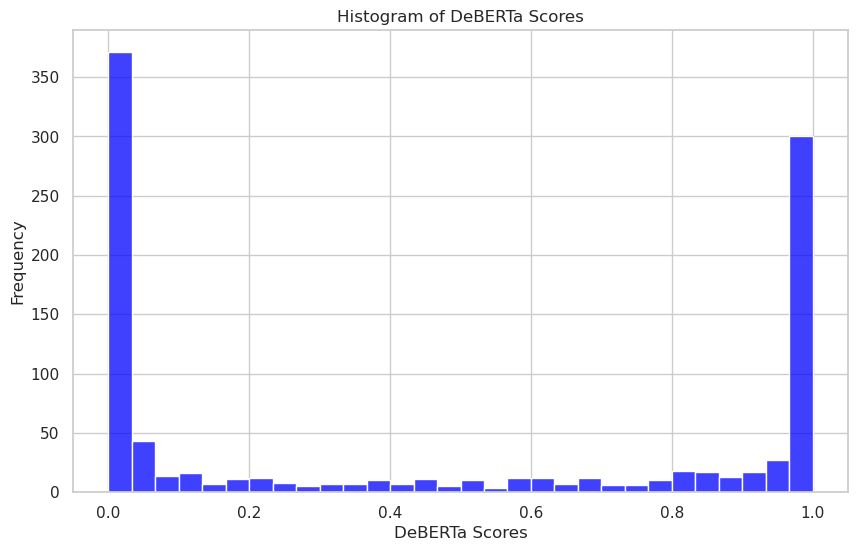

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['DeBERTa'], bins=30, kde=False, color='blue')
plt.title('Histogram of DeBERTa Scores')
plt.xlabel('DeBERTa Scores')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


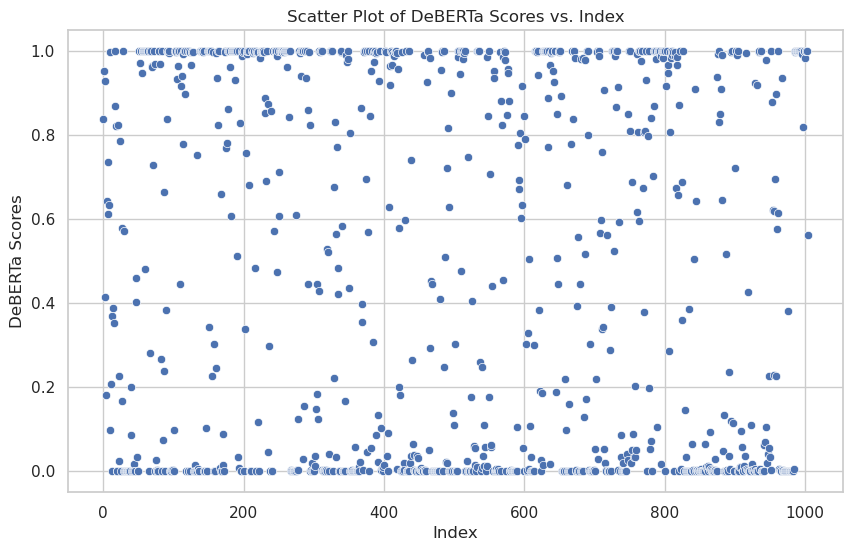

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating a scatter plot with index
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data.index, y=data['DeBERTa'])
plt.title('Scatter Plot of DeBERTa Scores vs. Index')
plt.xlabel('Index')
plt.ylabel('DeBERTa Scores')
plt.show()

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


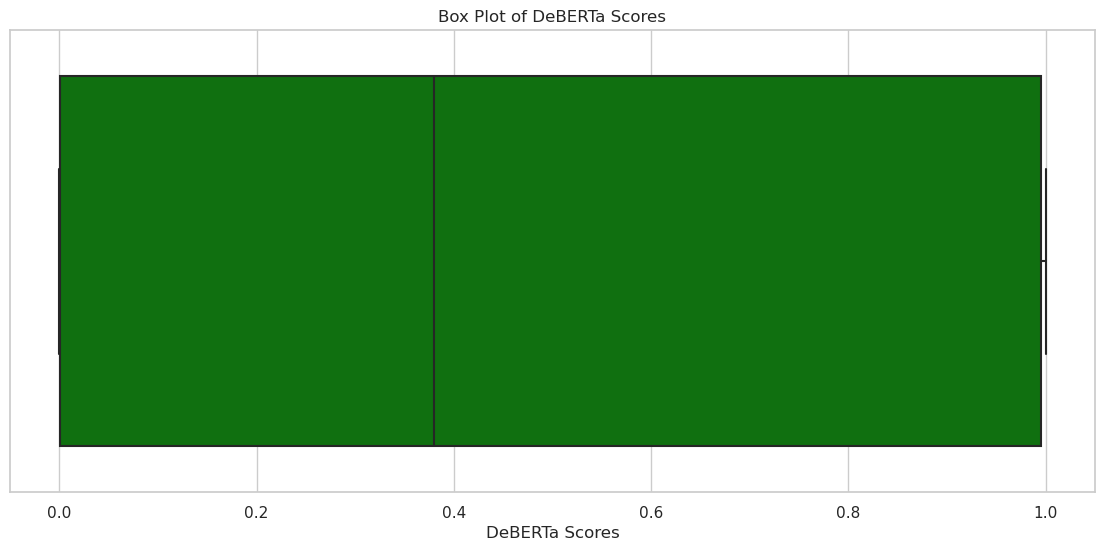

In [20]:
# Creating a box plot for the 'DeBERTa' column
plt.figure(figsize=(14, 6))
sns.boxplot(x=data['DeBERTa'], color='green')
plt.title('Box Plot of DeBERTa Scores')
plt.xlabel('DeBERTa Scores')
plt.show()

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Create a TF-IDF Vectorizer instance
vectorizer = TfidfVectorizer()

# Transform the text data to TF-IDF features for both columns separately
tfidf_fava = vectorizer.fit_transform(data['FAVA'].fillna(''))   # Handle missing values by replacing them with empty strings
tfidf_output = vectorizer.transform(data['Output'].fillna(''))   # Use the same vectorizer to ensure same feature space

# Compute cosine similarity between each pair of 'FAVA' and 'Output' in the same row
cosine_similarities = cosine_similarity(tfidf_fava, tfidf_output)

# Diagonal elements give the similarity scores between corresponding rows of 'FAVA' and 'Output'
similarity_scores = [cosine_similarities[i, i] for i in range(tfidf_fava.shape[0])]

# Save the similarity scores in a new column in the DataFrame
data['cosine_similarity'] = similarity_scores

# Optionally, display the DataFrame to confirm the new column
print(data[['FAVA', 'Output', 'cosine_similarity']])


                                                   FAVA  \
0     The revenue of the IT Services segment increas...   
1     The 2.0% decline in IT Products segment revenu...   
2     Revenue from the ISRE segment declined by 20.2...   
3     Effective April 1, 2023, the strategic change ...   
4     The selling and marketing expenses as a percen...   
...                                                 ...   
1000  The net tangible asset backing per share as at...   
1001  The cash inflows from operations were $4.889 m...   
1002  The total net debt of the Group as at 30 June ...   
1003  The final dividend declared for FY22 was 3.5 c...   
1004  The total dividends paid to shareholders for F...   

                                                 Output  cosine_similarity  
0     The revenue of the IT Services segment increas...                1.0  
1     The 2.0% decline in IT Products segment revenu...                1.0  
2     Revenue from the ISRE segment declined by 20.2...     

In [29]:
data['cosine_similarity']

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1000    1.0
1001    1.0
1002    1.0
1003    1.0
1004    1.0
Name: cosine_similarity, Length: 1005, dtype: float64

In [30]:
# Save the DataFrame back to CSV, overwriting the original file
data.to_csv(file_path, index=False)  

print("Data saved successfully with the new 'cosine_similarity' column.")

Data saved successfully with the new 'cosine_similarity' column.


/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


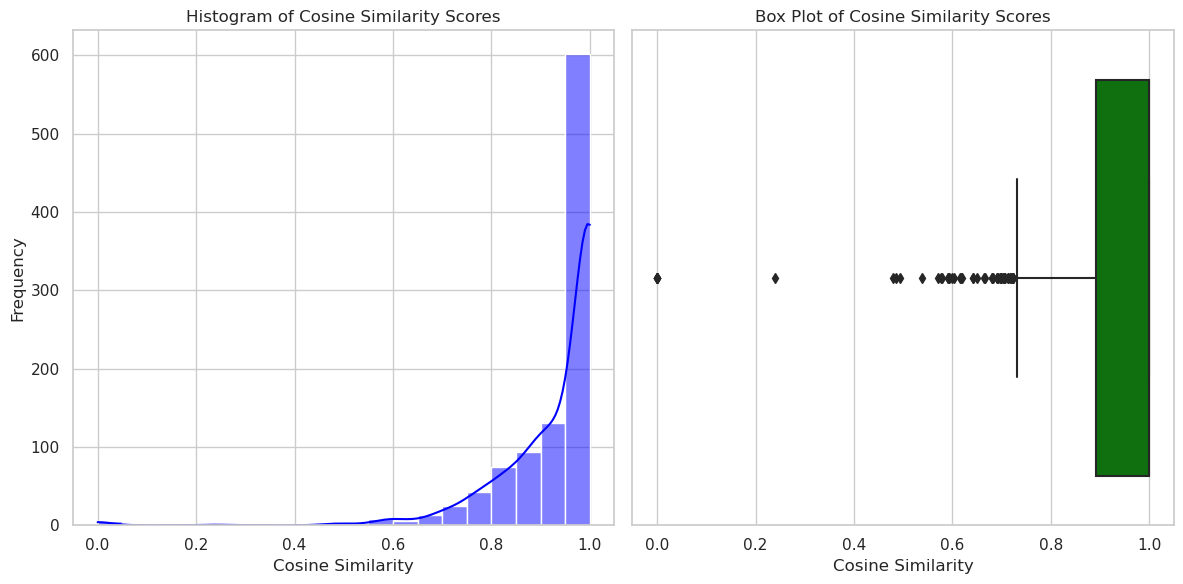

In [33]:
# Plotting the histogram and box plot for 'cosine_similarity' column
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['cosine_similarity'], bins=20, kde=True, color='blue')
plt.title('Histogram of Cosine Similarity Scores')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=data['cosine_similarity'], color='green')
plt.title('Box Plot of Cosine Similarity Scores')
plt.xlabel('Cosine Similarity')

plt.tight_layout()
plt.show()

In [35]:
!pip install umap

  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3541 sha256=fad140ebfbcc8493949c4f5ab5fceaf91d363a7269f10fce2952470dc1585a6f
  Stored in directory: /home/jovyan/.cache/pip/wheels/82/d8/73/e9eb3334baaad795ff0278363ff1aca7568bdf2793e452a527
Successfully built umap


/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


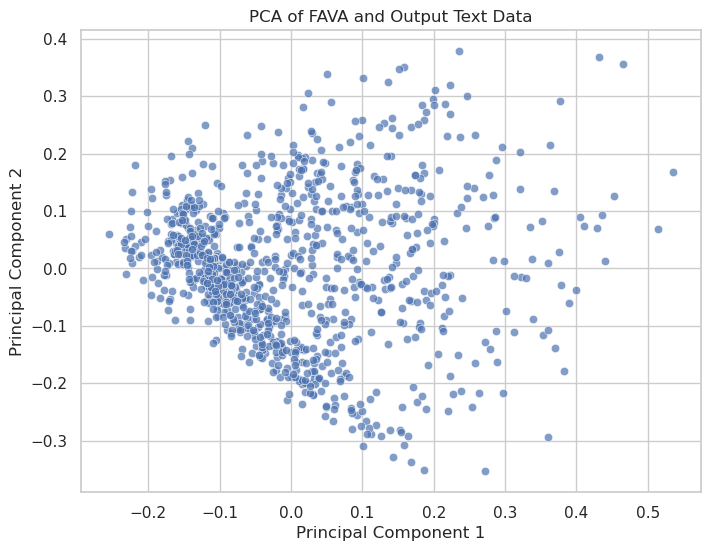

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Combine text data for vectorization
combined_text = data['FAVA'].fillna('') + " " + data['Output'].fillna('')

# Vectorize text data
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(combined_text)

# PCA Analysis
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix.toarray())  # Converting sparse matrix to a dense array for PCA

# Plotting PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], alpha=0.7)
plt.title('PCA of FAVA and Output Text Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'tfidf_matrix' is already defined and is the result of your TF-IDF vectorization
pca = PCA()
pca.fit(tfidf_matrix.toarray())

# Cumulative Explained Variance
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(8, 5))
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.show()
